In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import seaborn as sns
from ast import literal_eval

# sns.set_context("notebook", font_scale=1.25)
sns.set_theme('paper', font_scale=1.2)
sns.set_style('whitegrid')

In [48]:
path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/Newer data/prev_signficant_roles_3.csv'
df = pd.read_csv(path)

In [49]:
df.prev_movies_ratings = df.prev_movies_ratings.apply(literal_eval)
print(df.shape)
df.head()

(56066, 13)


,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes,prev_movies,prev_movies_ratings,prev_movies_numvotes
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0,"['tt0090660', 'tt0093260', 'tt0094933', 'tt009...","[5.7, 6.8, 6.1, 5.9, 5.7, 7.7, 5.9, 7.2, 5.6, ...","[11804.0, 60197.0, 10395.0, 18751.0, 1367.0, 2..."
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0,"['tt0120903', 'tt0180037', 'tt0212936']","[7.3, 6.4, 6.3]","[612256.0, 2228.0, 610.0]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie,2001.0,6.4,84717.0,"['tt0116041', 'tt0119296', 'tt0119891', 'tt013...","[7.0, 5.3, 5.4, 5.6, 7.5, 7.6]","[5825.0, 142.0, 21117.0, 142872.0, 1476.0, 972..."
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie,2001.0,6.4,84717.0,"['tt0118925', 'tt0119937', 'tt0122743', 'tt021...","[6.7, 6.8, 4.8, 6.5]","[2533.0, 7359.0, 823.0, 169530.0]"
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie,1943.0,6.1,271.0,[],[],[]


In [50]:
df.nconst.unique().shape

(5272,)

In [51]:
name_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/relevant_names.csv'
name = pd.read_csv(name_path)

In [52]:
print(name.shape)
name.head()

(5272, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
1,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0078788,tt0068646,tt0047296"
2,nm0000084,Gong Li,1965,\N,"actress,producer","tt0473444,tt0430357,tt0397535,tt0101640"
3,nm0000090,Armin Mueller-Stahl,1930,\N,"actor,director,writer","tt0117631,tt0765443,tt0963178,tt0139809"
4,nm0000092,John Cleese,1939,\N,"actor,writer,producer","tt0071853,tt0063929,tt0085959,tt0095159"


In [53]:
birthyear_dict = dict(zip(name.nconst, name.birthYear))

In [54]:
df['birthYear'] = df.apply(lambda x: birthyear_dict[x.nconst], axis=1)

In [55]:
df.head()

,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes,prev_movies,prev_movies_ratings,prev_movies_numvotes,birthYear
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0,"['tt0090660', 'tt0093260', 'tt0094933', 'tt009...","[5.7, 6.8, 6.1, 5.9, 5.7, 7.7, 5.9, 7.2, 5.6, ...","[11804.0, 60197.0, 10395.0, 18751.0, 1367.0, 2...",1961
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0,"['tt0120903', 'tt0180037', 'tt0212936']","[7.3, 6.4, 6.3]","[612256.0, 2228.0, 610.0]",1968
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie,2001.0,6.4,84717.0,"['tt0116041', 'tt0119296', 'tt0119891', 'tt013...","[7.0, 5.3, 5.4, 5.6, 7.5, 7.6]","[5825.0, 142.0, 21117.0, 142872.0, 1476.0, 972...",1967
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie,2001.0,6.4,84717.0,"['tt0118925', 'tt0119937', 'tt0122743', 'tt021...","[6.7, 6.8, 4.8, 6.5]","[2533.0, 7359.0, 823.0, 169530.0]",1974
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie,1943.0,6.1,271.0,[],[],[],1918


In [56]:
tmp = df[['tconst', 'startYear']].drop_duplicates()
movie_startyear = dict(zip(tmp.tconst, tmp.startYear))

In [57]:
movie_startyear['tt1371111'] # Cloud Atlas

2012.0

In [58]:
# Tom Hanks
print(df.groupby(['nconst'], sort=False)['startYear'].min().loc['nm0000158'])
print(df.groupby(['nconst'], sort=False)['startYear'].max().loc['nm0000158'])

1983.0
2022.0


In [59]:
df[df.nconst == 'nm0000158'].startYear.describe()

count      55.000000
mean     2002.545455
std        12.373535
min      1983.000000
25%      1991.000000
50%      2002.000000
75%      2014.000000
max      2022.000000
Name: startYear, dtype: float64

In [60]:
career_length = pd.DataFrame(df.groupby(['nconst'], sort=False)['startYear'].min()).reset_index()
career_length.head()

,nconst,startYear
0,nm0000212,1986.0
1,nm0413168,1999.0
2,nm0000630,1996.0
3,nm0005227,1997.0
4,nm0060931,1943.0


In [61]:
career_length['latestYear'] = df.groupby(['nconst'], sort=False)['startYear'].max().values
career_length['length'] = career_length.latestYear - career_length.startYear
career_length.head()

,nconst,startYear,latestYear,length
0,nm0000212,1986.0,2015.0,29.0
1,nm0413168,1999.0,2022.0,23.0
2,nm0000630,1996.0,2019.0,23.0
3,nm0005227,1997.0,2021.0,24.0
4,nm0060931,1943.0,2001.0,58.0


In [62]:
name_exp = name.assign(profession=name['primaryProfession'].str.split(',')).explode('profession')
print(name_exp.shape)
name_exp.head()

(12054, 7)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,profession
0,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057",actress
0,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057",soundtrack
1,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0078788,tt0068646,tt0047296",actor
1,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0078788,tt0068646,tt0047296",soundtrack
1,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0070849,tt0078788,tt0068646,tt0047296",director


In [63]:
principals_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/principals.csv'
principals = pd.read_csv(principals_path)

In [64]:
print(principals.shape)
principals.head()

(14122, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]"


In [65]:
tmp = principals[['nconst', 'category']].drop_duplicates()
profession_dict = dict(zip(tmp.nconst, tmp.category))

In [66]:
career_length['profession'] = career_length.apply(lambda x: profession_dict[x.nconst], axis=1)

In [67]:
career_length.head()

,nconst,startYear,latestYear,length,profession
0,nm0000212,1986.0,2015.0,29.0,actress
1,nm0413168,1999.0,2022.0,23.0,actor
2,nm0000630,1996.0,2019.0,23.0,actor
3,nm0005227,1997.0,2021.0,24.0,actor
4,nm0060931,1943.0,2001.0,58.0,actress


In [68]:
career_dict = career_length[['nconst', 'length', 'profession']].set_index('nconst').to_dict(orient='index')
len(career_dict.keys())

5272

In [69]:
movies_cast_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movies_cast_2.csv'
movies_cast = pd.read_csv(movies_cast_path)

In [70]:
movies_cast.nconst = movies_cast.nconst.apply(literal_eval)
print(movies_cast.shape)
movies_cast.head(2)

(3540, 20)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"[nm2209370, nm2913790, nm2104166, nm2910808]"
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"[nm3790547, nm6018502, nm4090362, nm2258992]"


In [71]:
movies_cast.iloc[0].nconst

['nm2209370', 'nm2913790', 'nm2104166', 'nm2910808']

In [72]:
movies_cast_exp = movies_cast.assign(genres_sep=movies_cast['genres'].str.split(',')).explode('genres_sep')
print(movies_cast_exp.shape)
movies_cast_exp.head(2)

(9124, 21)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst,genres_sep
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"[nm2209370, nm2913790, nm2104166, nm2910808]",Horror
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",...,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"[nm2209370, nm2913790, nm2104166, nm2910808]",Mystery


In [73]:
actors_genres = movies_cast_exp[['nconst', 'genres_sep']].explode('nconst')
actors_genres = actors_genres[actors_genres['nconst'] != 'nm1789985'] # Bye bye Jon Daly
print(actors_genres.shape)
actors_genres.head()

(36417, 2)


,nconst,genres_sep
0,nm2209370,Horror
0,nm2913790,Horror
0,nm2104166,Horror
0,nm2910808,Horror
0,nm2209370,Mystery


In [74]:
actors_genres['career_length'] = actors_genres.apply(lambda x: career_dict[x.nconst]['length'], axis=1)
actors_genres['profession'] = actors_genres.apply(lambda x: career_dict[x.nconst]['profession'], axis=1)
actors_genres.head()

,nconst,genres_sep,career_length,profession
0,nm2209370,Horror,5.0,actress
0,nm2913790,Horror,3.0,actor
0,nm2104166,Horror,0.0,actor
0,nm2910808,Horror,0.0,actress
0,nm2209370,Mystery,5.0,actress


In [75]:
actors_genres.to_csv('actors_genres.csv', index=False)

In [76]:
avg_career_genres = actors_genres[['nconst', 'genres_sep', 'career_length', 'profession']].groupby(by=['genres_sep', 'profession']).mean()
avg_career_genres

career_length
genres_sep  profession               
Action      actor           23.709677
            actress         17.619217
Adventure   actor           22.381346
            actress         18.098627
Biography   actor           21.958225
            actress         20.045570
Comedy      actor           21.386198
            actress         20.098402
Crime       actor           24.121135
            actress         20.230588
Documentary actor           14.250000
            actress          4.600000
Drama       actor           22.167709
            actress         19.756980
Family      actor           20.689218
            actress         18.982955
Fantasy     actor           21.966321
            actress         17.684322
History     actor           23.443526
            actress         20.853659
Horror      actor           18.359176
            actress         14.629183
Music       actor           18.610487
            actress         16.519126
Musical     actor           21.045455
            actress         17.051724
Mystery     actor           22.532839
            actress         17.990669
News        actor            3.333333
            actress          0.000000
Romance     actor           21.570997
            actress         20.901277
Sci-Fi      actor           22.383271
            actress         16.852217
Sport       actor           21.987654
            actress         18.258065
Thriller    actor           23.426014
            actress         17.669291
War         actor           20.007246
            actress         17.600000
Western     actor           23.916667
            actress         17.714286

In [77]:
genres_career_lookup = pd.pivot_table(avg_career_genres.reset_index(),
                                      values='career_length',
                                      index='genres_sep',
                                      columns='profession').to_dict(orient='index')
genres_career_lookup

{'Action': {'actor': 23.70967741935484, 'actress': 17.619217081850532},
 'Adventure': {'actor': 22.38134592680047, 'actress': 18.098626716604244},
 'Biography': {'actor': 21.95822454308094, 'actress': 20.045569620253165},
 'Comedy': {'actor': 21.386197743861977, 'actress': 20.098401598401598},
 'Crime': {'actor': 24.12113532691333, 'actress': 20.230588235294118},
 'Documentary': {'actor': 14.25, 'actress': 4.6},
 'Drama': {'actor': 22.167708557878854, 'actress': 19.756980351602895},
 'Family': {'actor': 20.6892177589852, 'actress': 18.982954545454547},
 'Fantasy': {'actor': 21.966321243523318, 'actress': 17.684322033898304},
 'History': {'actor': 23.443526170798897, 'actress': 20.853658536585368},
 'Horror': {'actor': 18.35917566241413, 'actress': 14.629183400267738},
 'Music': {'actor': 18.61048689138577, 'actress': 16.51912568306011},
 'Musical': {'actor': 21.045454545454547, 'actress': 17.051724137931036},
 'Mystery': {'actor': 22.532838983050848, 'actress': 17.990668740279936},
 'N

In [78]:
std_career_genres = actors_genres[['nconst', 'genres_sep', 'career_length', 'profession']].groupby(by=['genres_sep', 'profession']).std()

In [79]:
genres_career_std_lookup = pd.pivot_table(std_career_genres.reset_index(),
                                          values='career_length',
                                          index='genres_sep',
                                          columns='profession').to_dict(orient='index')
genres_career_std_lookup

{'Action': {'actor': 13.022975850439543, 'actress': 10.410070510898603},
 'Adventure': {'actor': 13.32876682674909, 'actress': 11.132565320344428},
 'Biography': {'actor': 14.033790369595438, 'actress': 13.219657312463633},
 'Comedy': {'actor': 13.000861186034602, 'actress': 12.933799359029349},
 'Crime': {'actor': 13.55729425488819, 'actress': 11.932910451042774},
 'Documentary': {'actor': 19.106281689538655, 'actress': 8.74887747901736},
 'Drama': {'actor': 13.914988016252362, 'actress': 12.975994695084276},
 'Family': {'actor': 13.744900056558025, 'actress': 12.897348136984945},
 'Fantasy': {'actor': 13.570927399993353, 'actress': 12.212551754083998},
 'History': {'actor': 14.0182982517249, 'actress': 12.041378744943136},
 'Horror': {'actor': 13.402948892145275, 'actress': 11.092003967418881},
 'Music': {'actor': 13.146869983518867, 'actress': 11.73135253065062},
 'Musical': {'actor': 14.538470788467846, 'actress': 15.761848691323586},
 'Mystery': {'actor': 13.806225331035693, 'actr

In [80]:
# for entry in genres_career_lookup.values():
#   print(entry['actor'], entry['actress'])
x = [entry['actor'] for entry in genres_career_lookup.values()]
y = [entry['actress'] for entry in genres_career_lookup.values()]

In [81]:
genres = list(genres_career_lookup.keys())

cmap = matplotlib.cm.get_cmap('inferno')
# cmap = sns.color_palette("Spectral", as_cmap=True)
colors = []
n = len(genres)
for i in range(0, cmap.N, int(cmap.N / n)):
    rgba = cmap(i)
    colors.append(matplotlib.colors.rgb2hex(rgba))
len(colors)

22

In [82]:
cmap = matplotlib.cm.get_cmap('tab20')
colors = []
n = len(genres)
for i in range(cmap.N):
    rgba = cmap(i)
    colors.append(matplotlib.colors.rgb2hex(rgba))
colors.append('#2a3233')
len(colors)

21

In [83]:
genre_count = pd.DataFrame(movies_cast_exp.genres_sep.value_counts()).reset_index()
genre_count

,index,genres_sep
0,Drama,1884
1,Comedy,1252
2,Action,993
3,Crime,705
4,Thriller,641
5,Romance,626
6,Adventure,625
7,Horror,443
8,Mystery,397
9,Fantasy,310


[64.67226688966699, 340.8446547782064, 372.4244344463421, 422.59312205459224, 551.0799120433143, 862.7177888221313, 1066.099622850709, 1130.0803674540864, 1612.012134082747, 2055.8337148896444, 2094.449105553488, 2132.751839286786, 2531.653728264984, 2731.5381645941325, 3467.4989843169446, 3471.343620384116, 3528.7892416355435, 3769.4175432248185, 4779.548943270194, 5612.49152708061, 7450.288359251721]


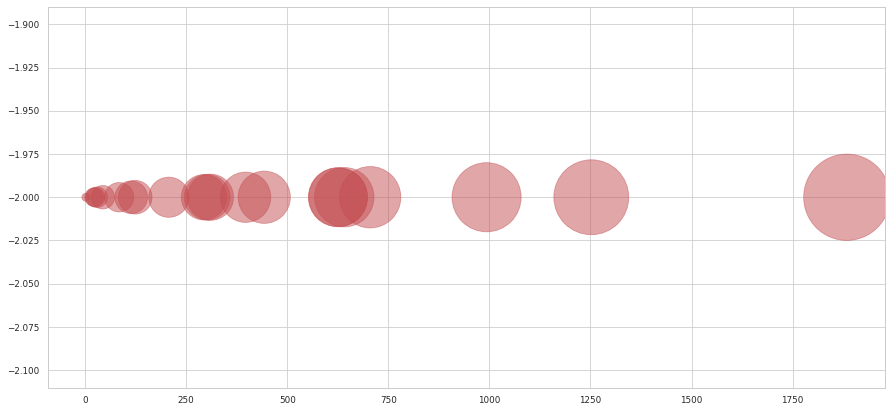

In [84]:
plt.figure(figsize=(15, 7))
x = genre_count.genres_sep.to_list()[::-1]
y = [0]*len(x)
s = [20*2**n for n in range(len(x))]
y2 = [-2]*len(x)
s2 = [40*2**np.log(n) for n in x]
print(s2)
# plt.scatter(x, y, s=s, alpha=0.5)
plt.scatter(x, y2, s=s2, color='r', alpha=0.5)
plt.show()

In [85]:
def get_marker_size(n):
  return 40*2**np.log(n)

genre_count['marker_size'] = genre_count.apply(lambda x: get_marker_size(x.genres_sep), axis=1)
genre_count.head()

,index,genres_sep,marker_size
0,Drama,1884,7450.288359
1,Comedy,1252,5612.491527
2,Action,993,4779.548943
3,Crime,705,3769.417543
4,Thriller,641,3528.789242


In [86]:
markers = dict(zip(genre_count['index'], genre_count['marker_size']))

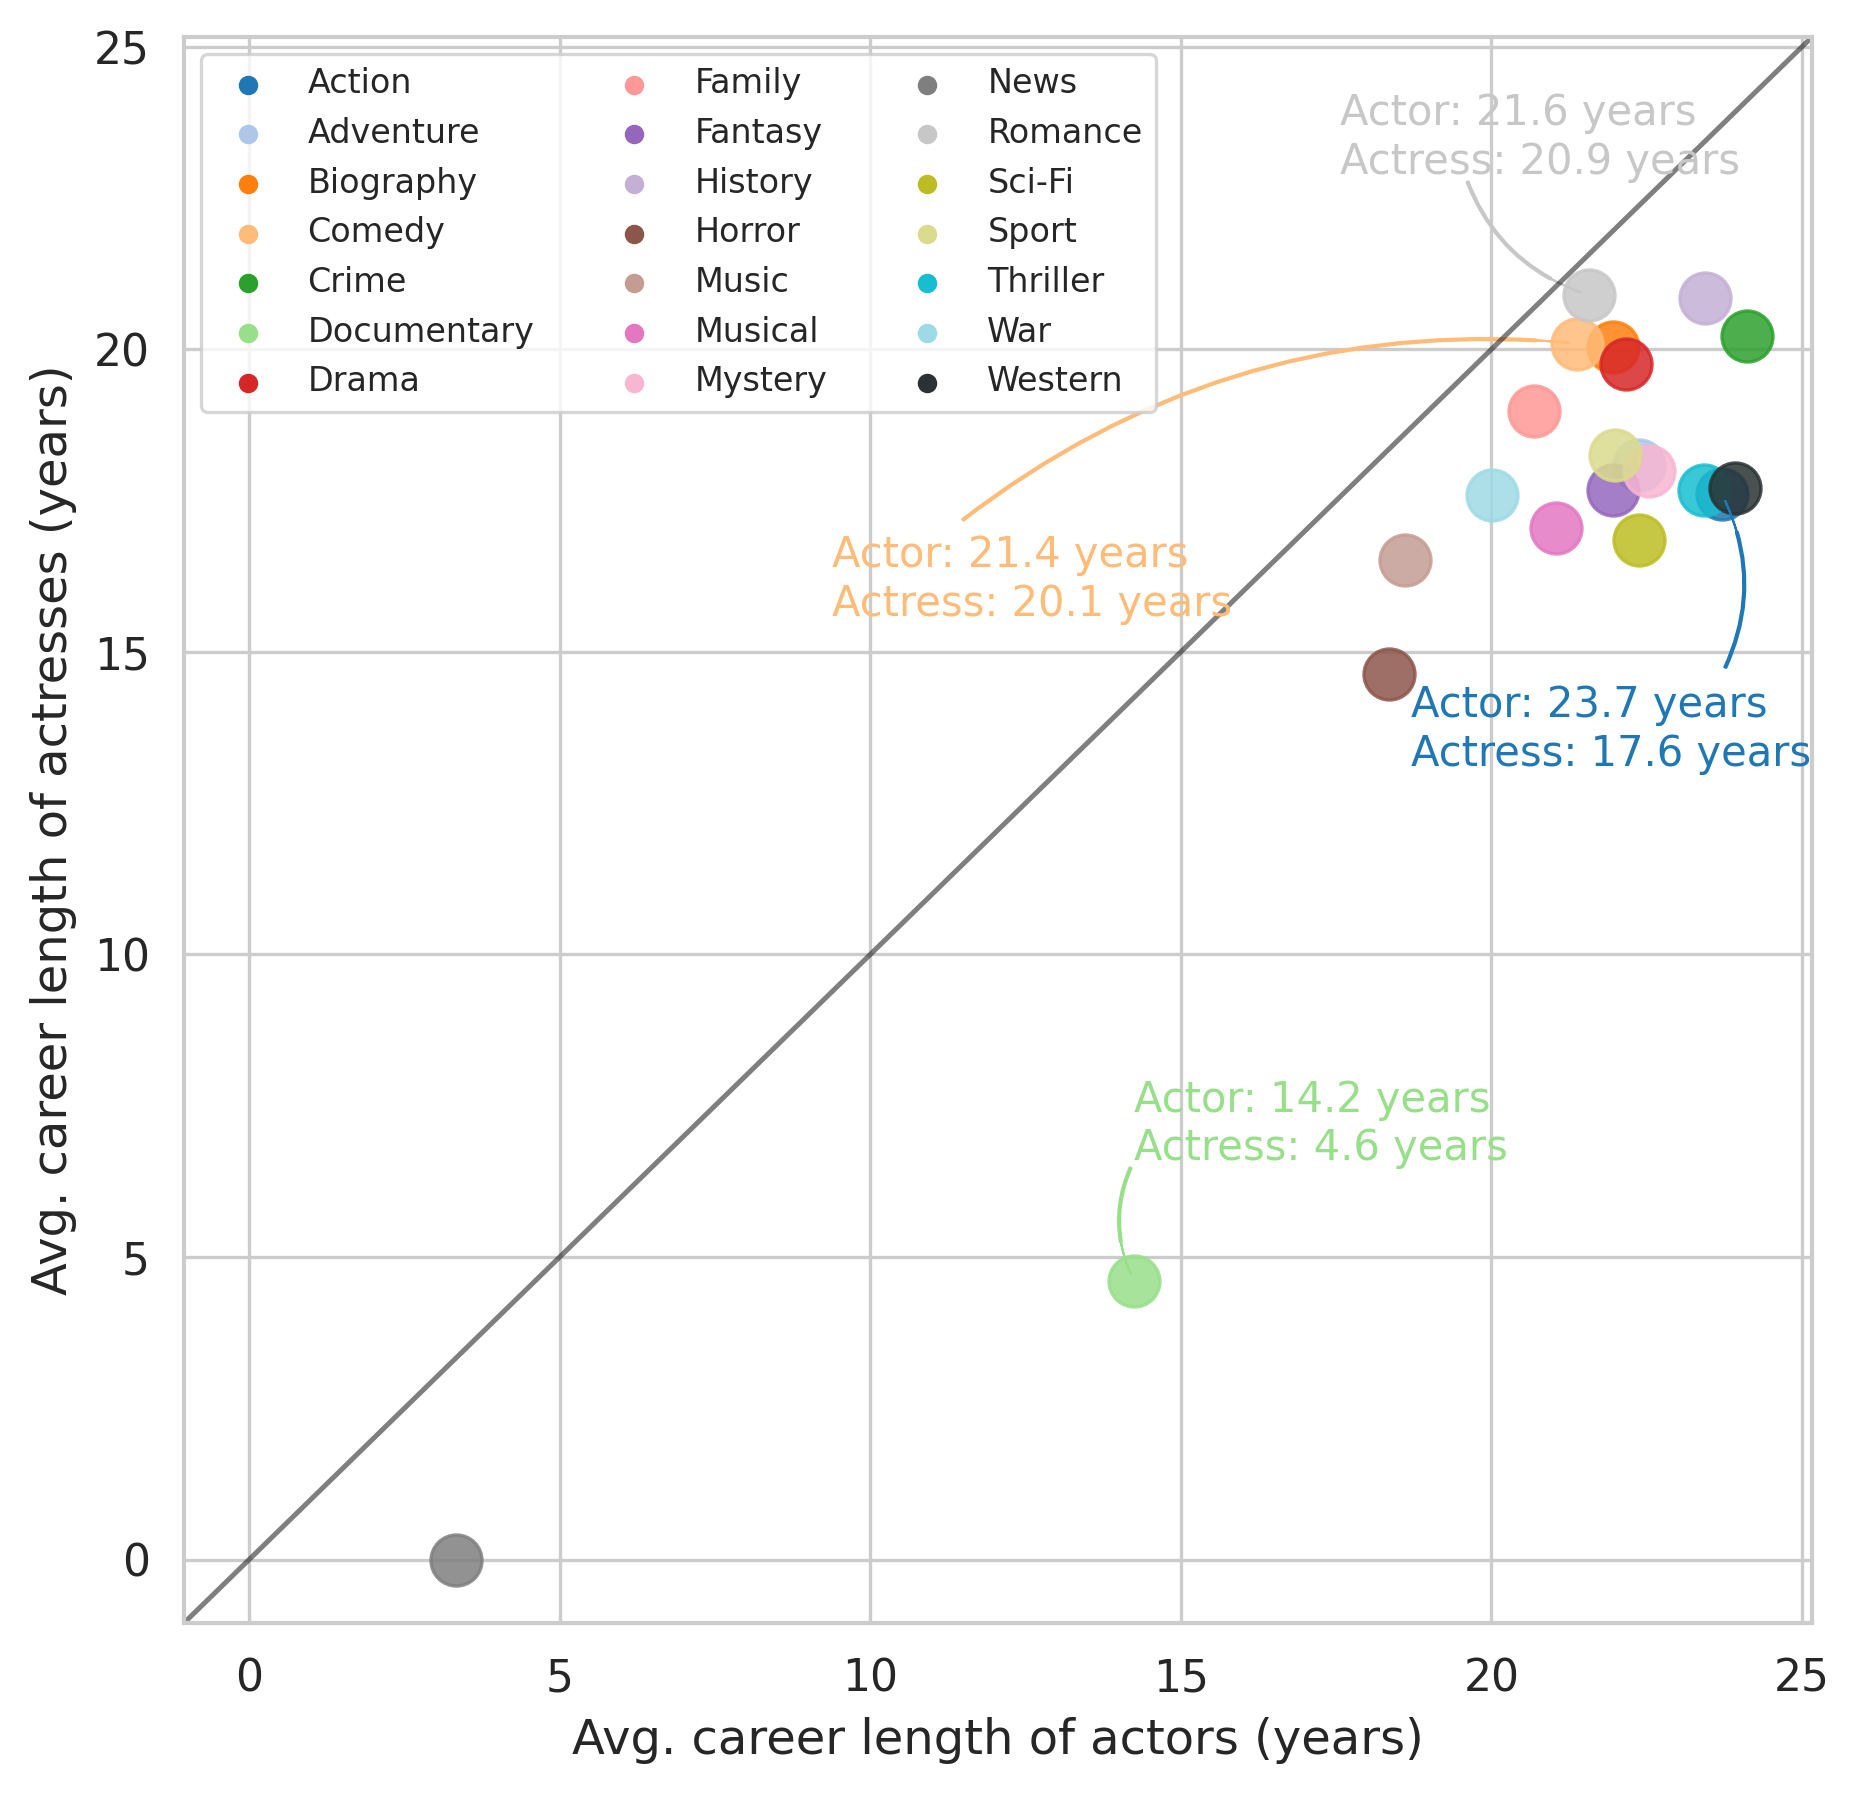

In [126]:

plt.figure(figsize=(7, 7), dpi=300)

for idx, genre in enumerate(genres):
  entry = genres_career_lookup[genre]
  plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=150, alpha=0.85)
  # plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=markers[genre], alpha=0.5)
  stds = genres_career_std_lookup[genre]
  # plt.errorbar(entry['actor'], entry['actress'], xerr=stds['actor'], yerr=stds['actress'], linestyle='None', marker='^', color=colors[idx], alpha=0.3)

# limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
plt.xlim(limits)
plt.ylim(limits)

plt.plot(limits, limits, color='black', alpha=0.5)

plt.xlabel('Avg. career length of actors (years)')
plt.ylabel('Avg. career length of actresses (years)')
plt.legend()

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=8, ncol=3)
for handle in lgnd.legendHandles:
    handle.set_sizes([15.0])
    handle.set_alpha(1)

style = "Simple, tail_width=0.5, head_width=0, head_length=8"
kw = dict(arrowstyle=style, linewidth=0.5)

# # Drama
# coor_drama = (genres_count_lookup['Drama']['actor'], genres_count_lookup['Drama']['actress'])
# coor_drama_src = (coor_drama[0]-300, coor_drama[1]-300)
# arr_drama = patches.FancyArrowPatch(coor_drama_src, coor_drama,
#                              connectionstyle="arc3, rad=.25", **kw)
# plt.text(coor_drama_src[0]-400, coor_drama_src[1]-250,
#          f'{coor_drama[0]} actors\n{coor_drama[1]} actresses', size = 14)

font_size = 10

# Action
coor_action = (genres_career_lookup['Action']['actor'], genres_career_lookup['Action']['actress'])
coor_action_src = (coor_action[0], coor_action[1]-3)
arr_action = patches.FancyArrowPatch(coor_action_src, coor_action,
                             connectionstyle="arc3, rad=.25", **kw, color=colors[genres.index('Action')])
plt.text(coor_action_src[0]-5, coor_action_src[1]-1.5,
         f'Actor: {coor_action[0]:.1f} years\nActress: {coor_action[1]:.1f} years', size = font_size, color=colors[genres.index('Action')])

# Comedy
coor_comedy = (genres_career_lookup['Comedy']['actor'], genres_career_lookup['Comedy']['actress'])
coor_comedy_src = (coor_comedy[0]-10, coor_comedy[1]-3)
arr_comedy = patches.FancyArrowPatch(coor_comedy_src, coor_comedy,
                             connectionstyle="arc3, rad=-.2", **kw, color=colors[genres.index('Comedy')])
plt.text(coor_comedy_src[0]-2, coor_comedy_src[1]-1.5,
         f'Actor: {coor_comedy[0]:.1f} years\nActress: {coor_comedy[1]:.1f} years', size = font_size, color=colors[genres.index('Comedy')])

# Romance
coor_romance = (genres_career_lookup['Romance']['actor'], genres_career_lookup['Romance']['actress'])
coor_romance_src = (coor_romance[0]-2, coor_romance[1]+2)
arr_romance = patches.FancyArrowPatch(coor_romance_src, coor_romance,
                             connectionstyle="arc3, rad=.25", **kw, color=colors[genres.index('Romance')])
plt.text(coor_romance_src[0]-2, coor_romance_src[1],
         f'Actor: {coor_romance[0]:.1f} years\nActress: {coor_romance[1]:.1f} years', size = font_size, color=colors[genres.index('Romance')])

# Documentary
coor_doc = (genres_career_lookup['Documentary']['actor'], genres_career_lookup['Documentary']['actress'])
coor_doc_src = (coor_doc[0], coor_doc[1]+2)
arr_doc = patches.FancyArrowPatch(coor_doc_src, coor_doc,
                             connectionstyle="arc3, rad=.25", **kw, color=colors[genres.index('Documentary')])
plt.text(coor_doc_src[0], coor_doc_src[1],
         f'Actor: {coor_doc[0]:.1f} years\nActress: {coor_doc[1]:.1f} years', size = font_size, color=colors[genres.index('Documentary')])

plt.gca().add_patch(arr_action)
plt.gca().add_patch(arr_comedy)
plt.gca().add_patch(arr_romance)
plt.gca().add_patch(arr_doc)

plt.show()

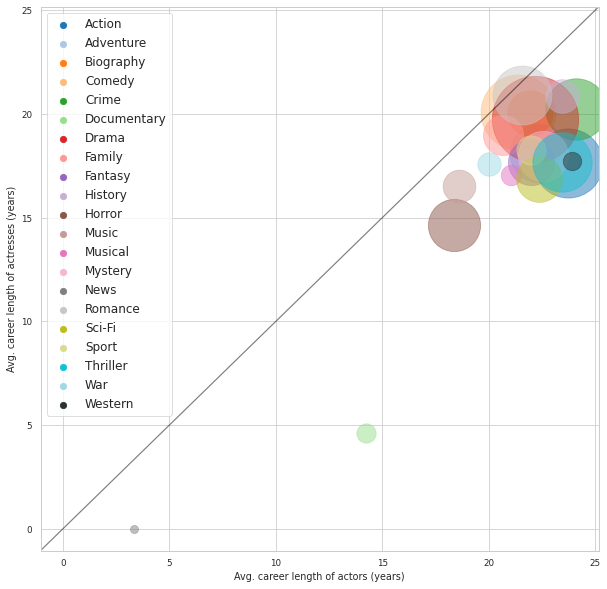

In [88]:
plt.figure(figsize=(10, 10))

for idx, genre in enumerate(genres):
  entry = genres_career_lookup[genre]
  # plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=150, alpha=0.85)
  plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=markers[genre], alpha=0.5)

# limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
plt.xlim(limits)
plt.ylim(limits)

plt.plot(limits, limits, color='black', alpha=0.5)

plt.xlabel('Avg. career length of actors (years)')
plt.ylabel('Avg. career length of actresses (years)')
plt.legend()

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=12)
for handle in lgnd.legendHandles:
    handle.set_sizes([40.0])
    handle.set_alpha(1)

plt.show()

In [89]:
career_length.head()

,nconst,startYear,latestYear,length,profession
0,nm0000212,1986.0,2015.0,29.0,actress
1,nm0413168,1999.0,2022.0,23.0,actor
2,nm0000630,1996.0,2019.0,23.0,actor
3,nm0005227,1997.0,2021.0,24.0,actor
4,nm0060931,1943.0,2001.0,58.0,actress


In [90]:
ages_lookup = name[['nconst', 'birthYear', 'deathYear']].set_index('nconst').to_dict(orient='index')

In [91]:
def lookup_birthyear(nconst):
  birthyear = ages_lookup[nconst]['birthYear']
  if birthyear == '\\N':
    return np.nan
  else:
    return int(birthyear)

def lookup_currentyear(nconst):
  currentyear = ages_lookup[nconst]['deathYear']
  if currentyear == '\\N':
    return 2022
  else:
    return int(currentyear)

career_length['birthYear'] = career_length.apply(lambda x: lookup_birthyear(x.nconst), axis=1)
career_length['currentYear'] = career_length.apply(lambda x: lookup_currentyear(x.nconst), axis=1)
career_length['age'] = career_length['currentYear'] - career_length['birthYear']
career_length.head()

,nconst,startYear,latestYear,length,profession,birthYear,currentYear,age
0,nm0000212,1986.0,2015.0,29.0,actress,1961.0,2022,61.0
1,nm0413168,1999.0,2022.0,23.0,actor,1968.0,2022,54.0
2,nm0000630,1996.0,2019.0,23.0,actor,1967.0,2022,55.0
3,nm0005227,1997.0,2021.0,24.0,actor,1974.0,2022,48.0
4,nm0060931,1943.0,2001.0,58.0,actress,1918.0,2007,89.0


In [92]:
age_dict = career_length[['nconst', 'age']].set_index('nconst').to_dict(orient='index')

In [93]:
actors_genres['age'] = actors_genres.apply(lambda x: age_dict[x.nconst]['age'], axis=1)
actors_genres.head()

,nconst,genres_sep,career_length,profession,age
0,nm2209370,Horror,5.0,actress,40.0
0,nm2913790,Horror,3.0,actor,NaN
0,nm2104166,Horror,0.0,actor,NaN
0,nm2910808,Horror,0.0,actress,NaN
0,nm2209370,Mystery,5.0,actress,40.0


In [94]:
avg_age_genres = actors_genres[['nconst', 'genres_sep', 'profession', 'age']].groupby(by=['genres_sep', 'profession']).mean()
avg_age_genres

age
genres_sep  profession           
Action      actor       54.441458
            actress     44.804991
Adventure   actor       52.770296
            actress     45.003886
Biography   actor       54.280172
            actress     49.446575
Comedy      actor       54.257173
            actress     49.404512
Crime       actor       56.269438
            actress     48.553244
Documentary actor       64.857143
            actress     45.000000
Drama       actor       54.399905
            actress     49.493176
Family      actor       51.795045
            actress     46.720721
Fantasy     actor       53.806540
            actress     44.885650
History     actor       54.885965
            actress     48.319328
Horror      actor       52.083149
            actress     43.407353
Music       actor       51.947791
            actress     44.971751
Musical     actor       55.344828
            actress     47.000000
Mystery     actor       55.089224
            actress     46.342149
News        actor       70.000000
            actress           NaN
Romance     actor       54.048193
            actress     49.457581
Sci-Fi      actor       52.634437
            actress     44.018519
Sport       actor       55.394737
            actress     49.168539
Thriller    actor       55.671603
            actress     46.150240
War         actor       51.750000
            actress     42.235294
Western     actor       54.090909
            actress     45.720000

In [95]:
genres_age_lookup = pd.pivot_table(avg_age_genres.reset_index(),
                                   values='age',
                                   index='genres_sep',
                                   columns='profession').to_dict(orient='index')
genres_age_lookup

{'Action': {'actor': 54.44145802650957, 'actress': 44.80499075785582},
 'Adventure': {'actor': 52.77029578351164, 'actress': 45.00388601036269},
 'Biography': {'actor': 54.2801724137931, 'actress': 49.446575342465756},
 'Comedy': {'actor': 54.257173219978746, 'actress': 49.40451206715635},
 'Crime': {'actor': 56.269438444924404, 'actress': 48.55324357405141},
 'Documentary': {'actor': 64.85714285714286, 'actress': 45.0},
 'Drama': {'actor': 54.3999054597022, 'actress': 49.49317594983401},
 'Family': {'actor': 51.79504504504504, 'actress': 46.72072072072072},
 'Fantasy': {'actor': 53.80653950953678, 'actress': 44.88565022421525},
 'History': {'actor': 54.8859649122807, 'actress': 48.319327731092436},
 'Horror': {'actor': 52.08314855875832, 'actress': 43.40735294117647},
 'Music': {'actor': 51.94779116465863, 'actress': 44.97175141242938},
 'Musical': {'actor': 55.3448275862069, 'actress': 47.0},
 'Mystery': {'actor': 55.08922363847045, 'actress': 46.34214876033058},
 'News': {'actor': 7

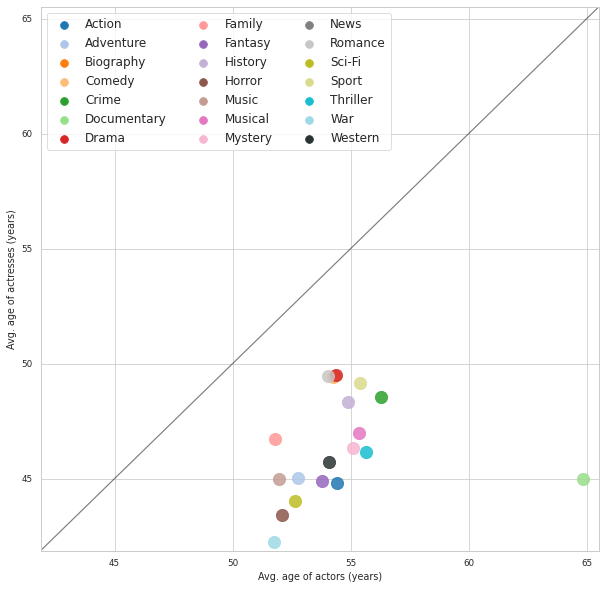

In [96]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 10))

for idx, genre in enumerate(genres):
  entry = genres_age_lookup[genre]
  plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=150, alpha=0.85)
  # plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=markers[genre], alpha=0.5)

limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
plt.xlim(limits)
plt.ylim(limits)

plt.plot(limits, limits, color='black', alpha=0.5)

plt.xlabel('Avg. age of actors (years)')
plt.ylabel('Avg. age of actresses (years)')
plt.legend()

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=12, ncol=3)
for handle in lgnd.legendHandles:
    handle.set_sizes([60.0])
    handle.set_alpha(1)

plt.show()

In [97]:
career_length['age_latestYear'] = career_length['latestYear'] - career_length['birthYear']
career_length.head()

,nconst,startYear,latestYear,length,profession,birthYear,currentYear,age,age_latestYear
0,nm0000212,1986.0,2015.0,29.0,actress,1961.0,2022,61.0,54.0
1,nm0413168,1999.0,2022.0,23.0,actor,1968.0,2022,54.0,54.0
2,nm0000630,1996.0,2019.0,23.0,actor,1967.0,2022,55.0,52.0
3,nm0005227,1997.0,2021.0,24.0,actor,1974.0,2022,48.0,47.0
4,nm0060931,1943.0,2001.0,58.0,actress,1918.0,2007,89.0,83.0


In [98]:
age_latestyear_dict = career_length[['nconst', 'age_latestYear']].set_index('nconst').to_dict(orient='index')

In [99]:
actors_genres['age_latestYear'] = actors_genres.apply(lambda x: age_latestyear_dict[x.nconst]['age_latestYear'], axis=1)
actors_genres.head()

,nconst,genres_sep,career_length,profession,age,age_latestYear
0,nm2209370,Horror,5.0,actress,40.0,30.0
0,nm2913790,Horror,3.0,actor,NaN,NaN
0,nm2104166,Horror,0.0,actor,NaN,NaN
0,nm2910808,Horror,0.0,actress,NaN,NaN
0,nm2209370,Mystery,5.0,actress,40.0,30.0


In [100]:
avg_age_latestyear_genres = actors_genres[['nconst', 'genres_sep', 'profession', 'age_latestYear']].groupby(by=['genres_sep', 'profession']).mean()
avg_age_latestyear_genres

age_latestYear
genres_sep  profession                
Action      actor            52.173785
            actress          41.792976
Adventure   actor            50.327250
            actress          42.042746
Biography   actor            51.804598
            actress          46.863014
Comedy      actor            50.850868
            actress          45.911857
Crime       actor            53.659287
            actress          45.294982
Documentary actor            59.476190
            actress          37.125000
Drama       actor            51.506263
            actress          46.294356
Family      actor            47.891892
            actress          42.588589
Fantasy     actor            50.836512
            actress          41.674888
History     actor            52.573099
            actress          45.655462
Horror      actor            48.274945
            actress          39.651471
Music       actor            47.971888
            actress          41.350282
Musical     actor            52.155172
            actress          42.937500
Mystery     actor            52.216686
            actress          42.909091
News        actor            54.000000
            actress                NaN
Romance     actor            50.654618
            actress          46.332130
Sci-Fi      actor            50.307285
            actress          41.089947
Sport       actor            51.429825
            actress          45.146067
Thriller    actor            52.959433
            actress          42.741587
War         actor            49.232759
            actress          39.176471
Western     actor            51.472727
            actress          42.840000

In [101]:
genres_age_latestyear_lookup = pd.pivot_table(avg_age_latestyear_genres.reset_index(),
                                   values='age_latestYear',
                                   index='genres_sep',
                                   columns='profession').to_dict(orient='index')
genres_age_latestyear_lookup

{'Action': {'actor': 52.17378497790869, 'actress': 41.79297597042514},
 'Adventure': {'actor': 50.327249842668344, 'actress': 42.04274611398964},
 'Biography': {'actor': 51.804597701149426, 'actress': 46.863013698630134},
 'Comedy': {'actor': 50.85086787105916, 'actress': 45.911857292759706},
 'Crime': {'actor': 53.659287257019436, 'actress': 45.29498164014688},
 'Documentary': {'actor': 59.476190476190474, 'actress': 37.125},
 'Drama': {'actor': 51.50626329472938, 'actress': 46.29435632607894},
 'Family': {'actor': 47.891891891891895, 'actress': 42.588588588588586},
 'Fantasy': {'actor': 50.83651226158038, 'actress': 41.67488789237668},
 'History': {'actor': 52.57309941520468, 'actress': 45.65546218487395},
 'Horror': {'actor': 48.27494456762749, 'actress': 39.65147058823529},
 'Music': {'actor': 47.971887550200805, 'actress': 41.35028248587571},
 'Musical': {'actor': 52.1551724137931, 'actress': 42.9375},
 'Mystery': {'actor': 52.216685979142525, 'actress': 42.90909090909091},
 'News

In [102]:
actors_genres[actors_genres['genres_sep'] == 'Documentary'][['age', 'age_latestYear', 'profession']].groupby('profession').mean()

,age,age_latestYear
profession,,
actor,64.857143,59.47619
actress,45.000000,37.12500


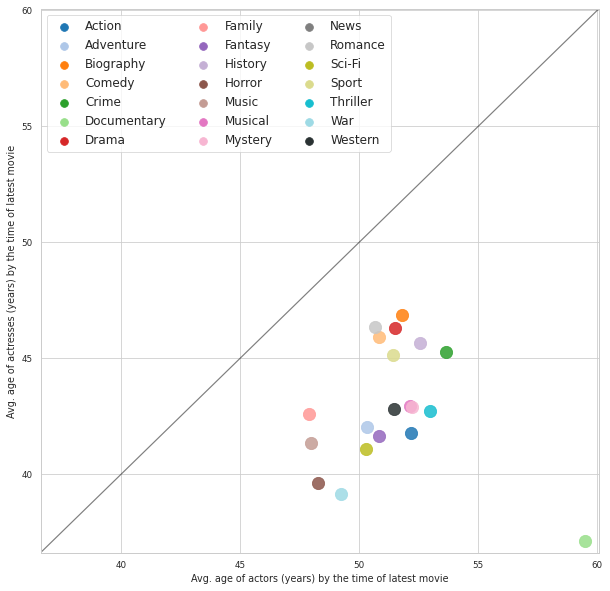

In [103]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 10))

for idx, genre in enumerate(genres):
  entry = genres_age_latestyear_lookup[genre]
  plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=150, alpha=0.85)
  # plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=markers[genre], alpha=0.5)

limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
plt.xlim(limits)
plt.ylim(limits)

plt.plot(limits, limits, color='black', alpha=0.5)

plt.xlabel('Avg. age of actors (years) by the time of latest movie')
plt.ylabel('Avg. age of actresses (years) by the time of latest movie')
plt.legend()

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=12, ncol=3)
for handle in lgnd.legendHandles:
    handle.set_sizes([60.0])
    handle.set_alpha(1)

plt.show()

In [104]:
df.head(2)

,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes,prev_movies,prev_movies_ratings,prev_movies_numvotes,birthYear
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0,"['tt0090660', 'tt0093260', 'tt0094933', 'tt009...","[5.7, 6.8, 6.1, 5.9, 5.7, 7.7, 5.9, 7.2, 5.6, ...","[11804.0, 60197.0, 10395.0, 18751.0, 1367.0, 2...",1961
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0,"['tt0120903', 'tt0180037', 'tt0212936']","[7.3, 6.4, 6.3]","[612256.0, 2228.0, 610.0]",1968


In [105]:
def get_total_movies(nconst, year):
  return len(df[(df.nconst == nconst) & (df.startYear == year)].iloc[0].prev_movies_ratings)

In [106]:
career_length['totalMovies'] = career_length.apply(lambda x: get_total_movies(x.nconst, x.latestYear), axis=1)

In [107]:
career_length.to_csv('career_length.csv', index=False)

In [108]:
career_length.head()

,nconst,startYear,latestYear,length,profession,birthYear,currentYear,age,age_latestYear,totalMovies
0,nm0000212,1986.0,2015.0,29.0,actress,1961.0,2022,61.0,54.0,29
1,nm0413168,1999.0,2022.0,23.0,actor,1968.0,2022,54.0,54.0,32
2,nm0000630,1996.0,2019.0,23.0,actor,1967.0,2022,55.0,52.0,29
3,nm0005227,1997.0,2021.0,24.0,actor,1974.0,2022,48.0,47.0,15
4,nm0060931,1943.0,2001.0,58.0,actress,1918.0,2007,89.0,83.0,6


In [109]:
def compute_experience(total_movies, career_length):
  try:
    return total_movies / career_length
  except:
    return np.nan

In [110]:
career_length['experience'] = career_length.apply(lambda x: compute_experience(x.totalMovies, x.length), axis=1)
career_length.head()

,nconst,startYear,latestYear,length,profession,birthYear,currentYear,age,age_latestYear,totalMovies,experience
0,nm0000212,1986.0,2015.0,29.0,actress,1961.0,2022,61.0,54.0,29,1.000000
1,nm0413168,1999.0,2022.0,23.0,actor,1968.0,2022,54.0,54.0,32,1.391304
2,nm0000630,1996.0,2019.0,23.0,actor,1967.0,2022,55.0,52.0,29,1.260870
3,nm0005227,1997.0,2021.0,24.0,actor,1974.0,2022,48.0,47.0,15,0.625000
4,nm0060931,1943.0,2001.0,58.0,actress,1918.0,2007,89.0,83.0,6,0.103448


(array([1251., 1306.,  869.,  391.,  196.,   65.,   13.,    5.,    8.,
           2.]),
 array([0.02272727, 0.35681818, 0.69090909, 1.025     , 1.35909091,
        1.69318182, 2.02727273, 2.36136364, 2.69545455, 3.02954545,
        3.36363636]),
 <a list of 10 Patch objects>)

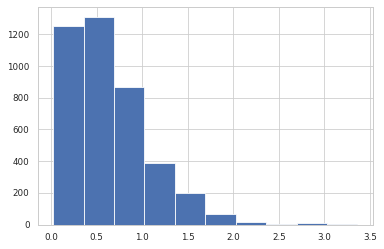

In [111]:
plt.hist(career_length.experience)

In [112]:
career_length[career_length.experience > 2.5]

,nconst,startYear,latestYear,length,profession,birthYear,currentYear,age,age_latestYear,totalMovies,experience
152,nm0000821,1971.0,2022.0,51.0,actor,1942.0,2022,80.0,80.0,151,2.960784
171,nm0000367,1972.0,2022.0,50.0,actor,1948.0,2022,74.0,74.0,139,2.780000
278,nm0000616,1978.0,2022.0,44.0,actor,1956.0,2022,66.0,66.0,148,3.363636
402,nm0490489,1982.0,2021.0,39.0,actor,1961.0,2022,61.0,60.0,106,2.717949
473,nm0451600,1984.0,2022.0,38.0,actor,1955.0,2022,67.0,67.0,104,2.736842
703,nm0000514,1982.0,2022.0,40.0,actor,1957.0,2022,65.0,65.0,111,2.775000
908,nm0001744,1991.0,2022.0,31.0,actor,1961.0,2022,61.0,61.0,86,2.774194
1213,nm0001803,1996.0,2022.0,26.0,actor,1944.0,2022,78.0,78.0,76,2.923077
1570,nm0290556,2002.0,2019.0,17.0,actor,1978.0,2022,44.0,41.0,56,3.294118
2427,nm1231899,2002.0,2021.0,19.0,actress,1982.0,2022,40.0,39.0,48,2.526316


In [113]:
career_length[career_length.nconst == 'nm0000158']

,nconst,startYear,latestYear,length,profession,birthYear,currentYear,age,age_latestYear,totalMovies,experience
445,nm0000158,1983.0,2022.0,39.0,actor,1956.0,2022,66.0,66.0,53,1.358974


In [114]:
print(actors_genres.shape)
actors_genres.head()

(36417, 6)


,nconst,genres_sep,career_length,profession,age,age_latestYear
0,nm2209370,Horror,5.0,actress,40.0,30.0
0,nm2913790,Horror,3.0,actor,NaN,NaN
0,nm2104166,Horror,0.0,actor,NaN,NaN
0,nm2910808,Horror,0.0,actress,NaN,NaN
0,nm2209370,Mystery,5.0,actress,40.0,30.0


In [115]:
genres_count = actors_genres[['nconst', 'genres_sep', 'profession', 'age_latestYear']].groupby(by=['genres_sep', 'profession']).count()
genres_count

nconst  age_latestYear
genres_sep  profession                        
Action      actor         2852            2716
            actress       1124            1082
Adventure   actor         1694            1589
            actress        801             772
Biography   actor          766             696
            actress        395             365
Comedy      actor         3014            2823
            actress       2002            1906
Crime       actor         1973            1852
            actress        850             817
Documentary actor           36              21
            actress         15               8
Drama       actor         4639            4231
            actress       2901            2711
Family      actor          473             444
            actress        352             333
Fantasy     actor          772             734
            actress        472             446
History     actor          363             342
            actress        123             119
Horror      actor         1019             902
            actress        747             680
Music       actor          267             249
            actress        183             177
Musical     actor           66              58
            actress         58              48
Mystery     actor          944             863
            actress        643             605
News        actor            3               1
            actress          2               0
Romance     actor         1324            1245
            actress       1175            1108
Sci-Fi      actor          801             755
            actress        406             378
Sport       actor          243             228
            actress         93              89
Thriller    actor         1676            1553
            actress        889             832
War         actor          138             116
            actress         35              34
Western     actor           60              55
            actress         28              25

In [116]:
genres_count_lookup = pd.pivot_table(genres_count.reset_index(),
                                   values='nconst',
                                   index='genres_sep',
                                   columns='profession').to_dict(orient='index')
genres_count_lookup

{'Action': {'actor': 2852, 'actress': 1124},
 'Adventure': {'actor': 1694, 'actress': 801},
 'Biography': {'actor': 766, 'actress': 395},
 'Comedy': {'actor': 3014, 'actress': 2002},
 'Crime': {'actor': 1973, 'actress': 850},
 'Documentary': {'actor': 36, 'actress': 15},
 'Drama': {'actor': 4639, 'actress': 2901},
 'Family': {'actor': 473, 'actress': 352},
 'Fantasy': {'actor': 772, 'actress': 472},
 'History': {'actor': 363, 'actress': 123},
 'Horror': {'actor': 1019, 'actress': 747},
 'Music': {'actor': 267, 'actress': 183},
 'Musical': {'actor': 66, 'actress': 58},
 'Mystery': {'actor': 944, 'actress': 643},
 'News': {'actor': 3, 'actress': 2},
 'Romance': {'actor': 1324, 'actress': 1175},
 'Sci-Fi': {'actor': 801, 'actress': 406},
 'Sport': {'actor': 243, 'actress': 93},
 'Thriller': {'actor': 1676, 'actress': 889},
 'War': {'actor': 138, 'actress': 35},
 'Western': {'actor': 60, 'actress': 28}}

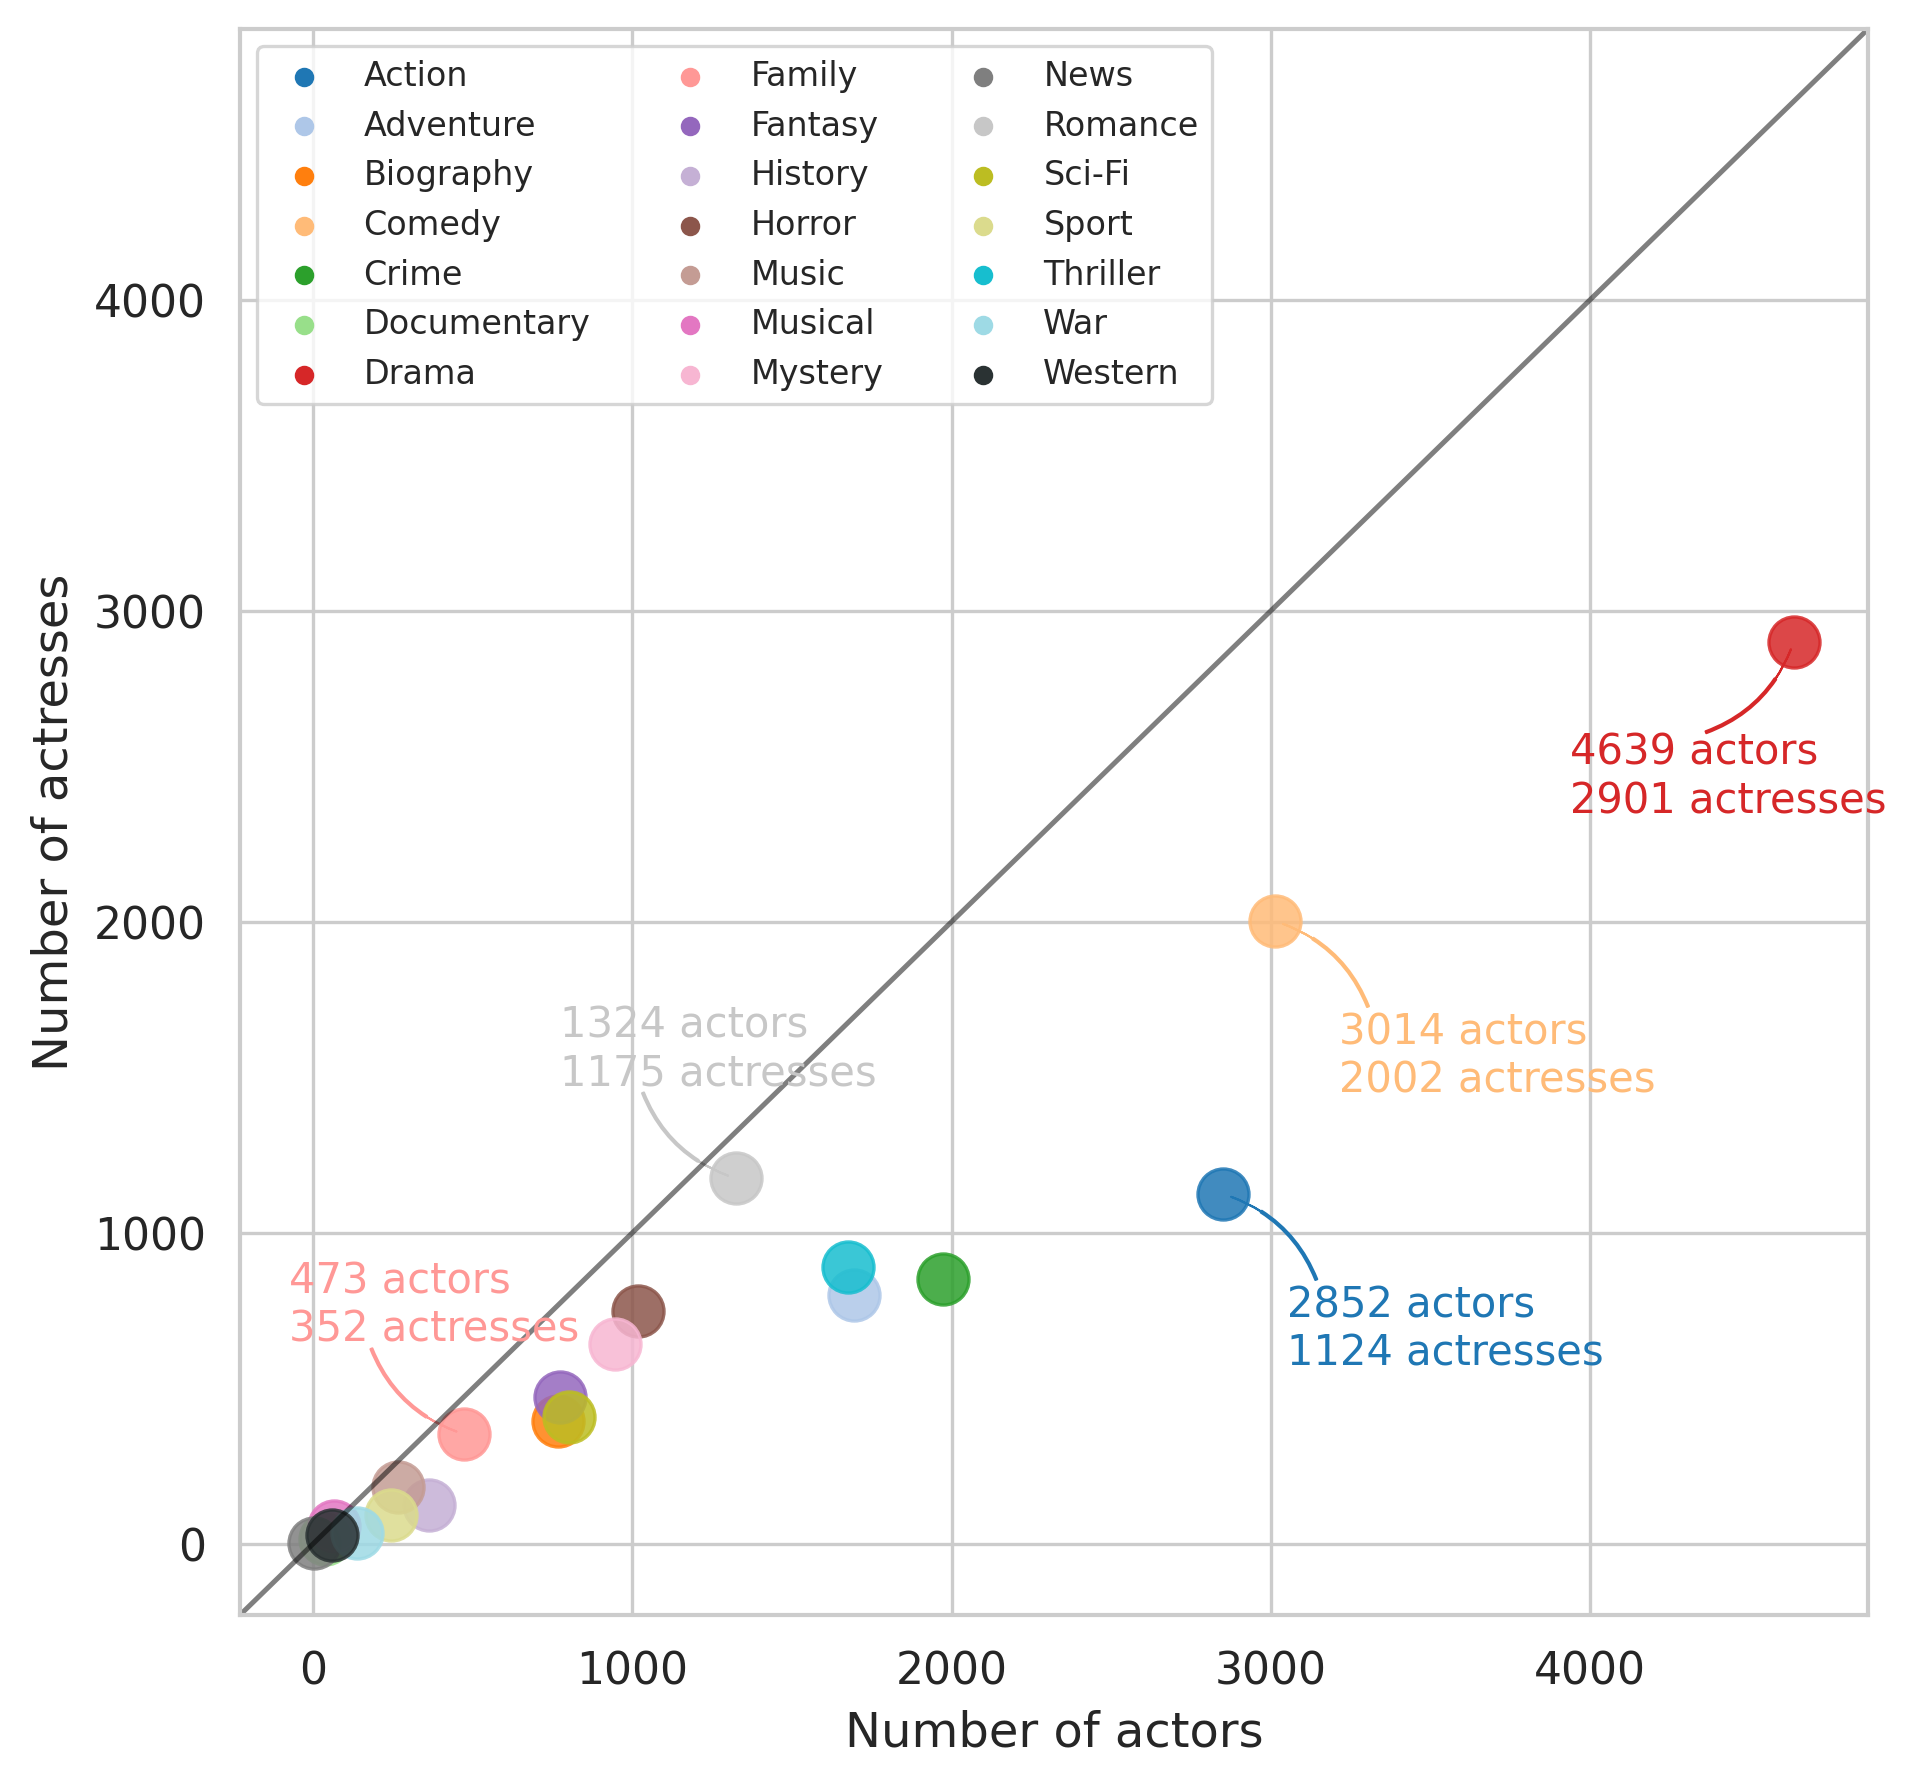

In [129]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 7), dpi=300)

for idx, genre in enumerate(genres):
  entry = genres_count_lookup[genre]
  plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=150, alpha=0.85)
  # plt.scatter(entry['actor'], entry['actress'], color=colors[idx], label=genre, s=markers[genre], alpha=0.5)

limits = (min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1]))
plt.xlim(limits)
plt.ylim(limits)

plt.plot(limits, limits, color='black', alpha=0.5)

plt.xlabel('Number of actors')
plt.ylabel('Number of actresses')
plt.legend()

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=8, ncol=3)
for handle in lgnd.legendHandles:
    handle.set_sizes([15.0])
    handle.set_alpha(1)

style = "Simple, tail_width=0.5, head_width=0, head_length=8"
kw = dict(arrowstyle=style, linewidth=0.5)

# Drama
coor_drama = (genres_count_lookup['Drama']['actor'], genres_count_lookup['Drama']['actress'])
coor_drama_src = (coor_drama[0]-300, coor_drama[1]-300)
arr_drama = patches.FancyArrowPatch(coor_drama_src, coor_drama,
                             connectionstyle="arc3, rad=.25", **kw, color=colors[genres.index('Drama')])
plt.text(coor_drama_src[0]-400, coor_drama_src[1]-250,
         f'{coor_drama[0]} actors\n{coor_drama[1]} actresses', size = font_size, color=colors[genres.index('Drama')])

# Action
coor_action = (genres_count_lookup['Action']['actor'], genres_count_lookup['Action']['actress'])
coor_action_src = (coor_action[0]+300, coor_action[1]-300)
arr_action = patches.FancyArrowPatch(coor_action_src, coor_action,
                             connectionstyle="arc3, rad=.25", **kw, color=colors[genres.index('Action')])
plt.text(coor_action_src[0]-100, coor_action_src[1]-250,
         f'{coor_action[0]} actors\n{coor_action[1]} actresses', size = font_size, color=colors[genres.index('Action')])

# Comedy
coor_comedy = (genres_count_lookup['Comedy']['actor'], genres_count_lookup['Comedy']['actress'])
coor_comedy_src = (coor_comedy[0]+300, coor_comedy[1]-300)
arr_comedy = patches.FancyArrowPatch(coor_comedy_src, coor_comedy,
                             connectionstyle="arc3, rad=.25", **kw, color=colors[genres.index('Comedy')])
plt.text(coor_comedy_src[0]-100, coor_comedy_src[1]-250,
         f'{coor_comedy[0]} actors\n{coor_comedy[1]} actresses', size = font_size, color=colors[genres.index('Comedy')])

# Romance
coor_romance = (genres_count_lookup['Romance']['actor'], genres_count_lookup['Romance']['actress'])
coor_romance_src = (coor_romance[0]-300, coor_romance[1]+300)
arr_romance = patches.FancyArrowPatch(coor_romance_src, coor_romance,
                             connectionstyle="arc3, rad=.25", **kw, color=colors[genres.index('Romance')])
plt.text(coor_romance_src[0]-250, coor_romance_src[1],
         f'{coor_romance[0]} actors\n{coor_romance[1]} actresses', size = font_size, color=colors[genres.index('Romance')])

# Family
coor_family = (genres_count_lookup['Family']['actor'], genres_count_lookup['Family']['actress'])
coor_family_src = (coor_family[0]-300, coor_family[1]+300)
arr_family = patches.FancyArrowPatch(coor_family_src, coor_family,
                             connectionstyle="arc3, rad=.25", **kw, color=colors[genres.index('Family')])
plt.text(coor_family_src[0]-250, coor_family_src[1],
         f'{coor_family[0]} actors\n{coor_family[1]} actresses', size = font_size, color=colors[genres.index('Family')])

plt.gca().add_patch(arr_drama)
plt.gca().add_patch(arr_action)
plt.gca().add_patch(arr_comedy)
plt.gca().add_patch(arr_romance)
plt.gca().add_patch(arr_family)

plt.show()